<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Linear Regression: Further Practice

For this example, we will build on the bikes dataset we used last time, this time with more "best practice".

Read in the bikes dataset.

In [8]:
import pandas as pd

In [20]:
df = pd.read_csv("/Users/tyrone/programming/ga/datascience/11_making_better_predictions/assets/data/bikeshare.csv")
df.rename(columns={'count':'total_rentals'},inplace=True)

In [21]:
df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,total_rentals
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32


#### 1: Choose 3 features to predict `total_rentals` and put them in variables X and y

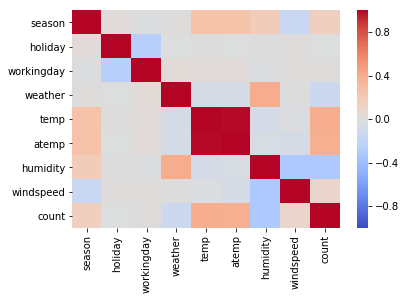

In [17]:
import seaborn as sns

sns.heatmap(df.corr(),
           vmin=-1,
           vmax=1,
           center=0,
            cmap="coolwarm");

In [22]:
X = df[["season", "temp", "humidity"]]
y = df["total_rentals"]

#### 2: Create a training and test set

We'll be using the training set for cross-validation

In [25]:
from sklearn.model_selection import KFold, train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

seven_fold_cv = KFold(n_splits=7, shuffle=True, random_state=42)

#### 3: Measure the performance of your model across 7 folds

Get a feel for your model's performance. Try both RMSE (using `'neg_mean_squared_error'`) and Mean Absolute Error (MAE) using `'neg_mean_absolute_error'` as scoring metrics and compare them.

In [33]:
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np
from sklearn.linear_model import LinearRegression
model = LinearRegression()

cv_scores = cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=7)

rmse_scores = np.sqrt(-cv_scores)
print(rmse_scores)
print("Mean RMSE: {0:.1f}".format(np.mean(rmse_scores)))

[155.04805375 152.50671366 158.44548146 158.4206036  161.77141179
 153.15227598 156.57588155]
Mean RMSE: 156.6


In [35]:
# Now try MAE instead

cv_scores_mae = cross_val_score(model, X_train, y_train, scoring="neg_mean_absolute_error", cv=7)

print(cv_scores_mae)
print("Mean MAE: {0:.1f}".format(np.mean(-cv_scores_mae)))

[-119.58216915 -114.55047028 -118.40816072 -117.88322953 -118.3682506
 -115.48530362 -119.83742521]
Mean MAE: 117.7


#### 4: We'll try two more models

First, do a new train-test split on the entire bikes data.

Previously, we only used 3 features for our split, but we want access to all of them now, so we can train different models that use different combinations of features.

We will do both our cross-validated training and model evaluation on our **training** set.

In [41]:
from sklearn.model_selection import KFold, train_test_split

X = df[["season","holiday","workingday","weather","windspeed", "temp", "humidity"]]
y = df["total_rentals"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

Now try **two** more models with different combinations of features and compare their performance.

*As bonus practice, you could put the code you've written so far into a function so you can easily try different combinations of features!*

*For example, it could take as parameters a feature matrix X (your training set) and y (your training targets) and a list of columns to use for the model, and could print/return the cross-validated scores.*

```python
def evaluate_features(features, X, y):
    ...```

In [42]:
# Features - Variation 1 (everything)
cv_scores = cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=7)

rmse_scores = np.sqrt(-cv_scores)
print(rmse_scores)
print("Mean RMSE: {0:.1f}".format(np.mean(rmse_scores)))

[157.05844436 156.65774622 155.04165225 152.45109692 150.729215
 156.46559846 158.18487235]
Mean RMSE: 155.2


In [43]:
# Features - Variation 2 (simple)
X = df[["holiday","temp"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

# This is the point where it is best to cut the global dataframe X to get the columns you require!!
cv_scores = cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=7)

rmse_scores = np.sqrt(-cv_scores)
print(rmse_scores)
print("Mean RMSE: {0:.1f}".format(np.mean(rmse_scores)))

[167.525619   165.1814032  165.31663673 168.36034205 158.81718075
 166.35545666 170.17272389]
Mean RMSE: 166.0


In [44]:
# Define a generic function to test different feature combinations with cross-validation folds
def evaluate_features(features, X, y):
    X = df[features]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)
    cv_scores = cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=7)
    rmse_scores = np.sqrt(-cv_scores)
    print(rmse_scores)
    print("Mean RMSE: {0:.1f}".format(np.mean(rmse_scores)))

In [51]:
# Run different combinations through the function to evaluate model fit
X = df[["season","holiday","workingday","weather","windspeed", "temp", "humidity"]]
y = df["total_rentals"]
evaluate_features(["season", "windspeed"], X, y)
evaluate_features(["season", "temp"], X, y)
evaluate_features(["humidity", "temp", "windspeed"], X, y)

[175.27644063 175.57332034 176.25444145 176.70542424 171.27201924
 180.01220801 179.10119249]
Mean RMSE: 176.3
[167.90124277 164.94949009 164.76217184 167.24860179 158.44102449
 166.16880585 169.40989735]
Mean RMSE: 165.6
[157.54982796 158.20517752 156.89840525 155.80750507 152.43994709
 157.87162448 160.50783779]
Mean RMSE: 157.0


#### 5: Take the best of your three trained models and evaluate it on the *test* set.

This is to get an estimate of how well your model performs in the real world. It would be your final reported accuracy score. After this step, you should **not** train-test on the same data anymore, because you will be prone to overfitting.

For this question, first use your best model to predict values on the test inputs (X_test) and compare to the actual values (y_test).

(*Note: if you have a model object from step 4, but used `cross_val_score` to evaluate performance, you will need to fit the model again because `cross_val_score` doesn't do this for you.*)

In [55]:
# Split (according to previous best outcome)
X = df[["humidity", "temp", "windspeed"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

# Train
model.fit(X_train.values, y_train)

# Predict 
y_pred = model.predict(X_test.values)
y_pred

# Check predicted metrics
from sklearn import metrics
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE: 159.77361936689957


#### 6: How did your model do?

If your test set error is similar to the training/cross-validated error, it means your training accuracy was representative of the model's real world performance.

Overfitting happens when your test error is much higher than your training error - i.e. your model hasn't generalised.

Look at the output from **5** - how well did your model do "in the real world"?

In [ ]:
# It was really close 157, vs. 159

In [57]:
# Compare it to a dumb model
y_pred_mean = [y_train.mean()] * len(y_test)

print('RMSE (model):', np.sqrt(metrics.mean_squared_error(y_test, y_pred_mean)))

RMSE (model): 183.24962019993424
